In [0]:
import pandas as pd


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/HaythemGaja/Cab-Fare-Prediction/master/train_cab.csv')

In [0]:
df.shape #This is used to find the dimensions of the dataset. So it contains 16067 rows and 7 columns.


(16067, 7)

In [0]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [0]:
df.tail()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [0]:
df[df.isnull().any(axis=1)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
26,NaN,2011-02-07 20:01:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0
31,22.54,2015-06-21 21:46:34 UTC,-74.010483,40.717667,-73.985771,40.660366,NaN
64,7.3,2011-11-07 10:47:40 UTC,-74.003919,40.753019,-73.992368,40.735362,NaN
69,NaN,2015-05-12 23:51:42 UTC,-73.954796,40.779335,-73.944931,40.780087,1.0
...,...,...,...,...,...,...,...
8178,NaN,2015-03-10 06:19:43 UTC,-73.979927,40.735802,-74.011360,40.713360,1.0
8226,NaN,2011-08-13 01:33:02 UTC,-74.007081,40.741155,-73.835494,40.703821,4.0
8259,57.54,2015-05-03 16:49:52 UTC,-73.781990,40.644798,-73.965096,40.803551,NaN
8306,6.9,2010-12-12 11:43:16 UTC,-73.983912,40.756814,-73.979796,40.765198,NaN


In [0]:
df.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [0]:
df['fare_amount'] = pd.to_numeric(df['fare_amount'], errors='coerce') # Convert Strings to Floats
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

## Cleaning the Data

In [0]:
df1=df.copy()


In [0]:
df1.loc[df1['fare_amount']<=0,'fare_amount'] = np.nan # changing  -ve fare values to null

In [0]:
df1=df1.dropna(how='any') # droping null values


In [0]:
df1.isnull().sum() # duble check for null values

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [0]:
df1["pickup_longitude"].value_counts(sort=True).head()  #  check for zero values

 0.000000     313
-73.137393     10
-73.977897      4
-73.975040      4
-73.991467      4
Name: pickup_longitude, dtype: int64

In [0]:
# droping zero values
df2=df1[df1.pickup_longitude != 0]            
df2=df2[df2.pickup_latitude != 0]
df2=df2[df2.dropoff_longitude != 0]
df2=df2[df2.dropoff_latitude != 0]
df2=df2[df2.passenger_count != 0]

In [0]:
df2["pickup_longitude"].value_counts(sort=True).head()  # duble check for zero values

-73.137393    10
-73.971732     4
-73.981158     4
-73.976162     4
-73.994200     4
Name: pickup_longitude, dtype: int64

In [0]:
# let us find the distance travelled using latitude and longitude points using haversine formula and then handle the remaining outliers for efficient processing. 



import math

df2=df2.reset_index(drop=True)  #reset index 

def haversine(lon1, lat1, lon2, lat2):
    """
#    Calculate the great circle distance between two points 
#    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

for i in range(0,df2.shape[0]):

    df2.loc[i,'distance_travelled'] = haversine(df2.pickup_longitude[i],df2.pickup_latitude[i],df2.dropoff_longitude[i],df2.dropoff_latitude[i])
    i

    

In [0]:
df2.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0,3.787239
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0,1.555807
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0,4.155444
8,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0,2.849627
9,5.3,2012-04-08 07:30:50 UTC,-73.996335,40.737142,-73.980721,40.733559,1.0,1.374577


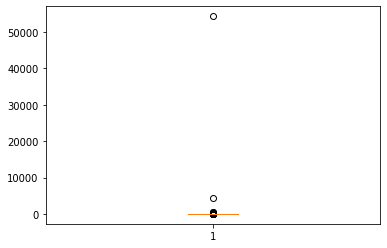

In [0]:
import matplotlib.pyplot as plt
plt.boxplot(df2['fare_amount']);


*Now*. we will remove the outliers from all the variables except 'pickup_datetime' 

In [0]:
df8=df2

In [0]:
df8

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157
...,...,...,...,...,...,...,...,...
15599,10.9,2009-05-20 18:56:42 UTC,-73.994191,40.751138,-73.962769,40.769719,1.0,3.357490
15600,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0,0.850044
15601,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0,7.867638
15602,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0,1.469105


In [0]:


cnames = ["fare_amount","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count", 'distance_travelled'] 

#Detect outliers

for i in cnames:
    q75, q25 = np.percentile(df8.loc[:,i], [75 ,25])
    iqr = q75 - q25
    low = q25 - (iqr*1.5)
    high = q75 + (iqr*1.5)
    df8.loc[df8[i] < low,i] = np.nan
    df8.loc[df8[i] > high,i] = np.nan


missing_val = pd.DataFrame(df8.loc[:,cnames].isnull().sum())
missing_val.columns = ["Outliers"] 
print (missing_val)  #displays number of outliers in the variables

                    Outliers
fare_amount             1355
pickup_longitude         804
pickup_latitude          509
dropoff_longitude        918
dropoff_latitude         750
passenger_count         1655
distance_travelled      1349


Now, as there are many outlier data points very close to the main range, we can omit only those values beyond the main range depending upon the variables.

In [0]:


df2.loc[df2['fare_amount']>1000,'fare_amount'] = np.nan

df2.loc[df2['distance_travelled']<=0,'distance_travelled'] = np.nan # for zeros values

#Generally, in a cab, maximum 7 passengers can be boarded at a time. 
#So those values beyond 7 can be omitted in 'passenger_count' variable

df2.loc[df2['passenger_count']>7,'passenger_count'] = np.nan



In [0]:
df2=df2.dropna(how='any') # droping null values

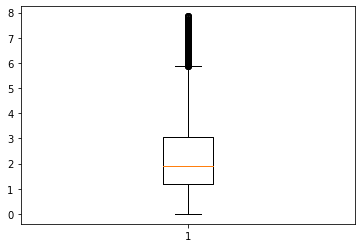

In [0]:
plt.boxplot(df2['distance_travelled']);

In [0]:
min(df2.fare_amount)

0.01

In [0]:
df2["passenger_count"].value_counts(sort=True).head()  # duble check for zero values

1.0    9305
2.0    1887
3.0     559
Name: passenger_count, dtype: int64

In [0]:
#check to see if all passenger_count is integer 
np.array_equal(df2.passenger_count, df2.passenger_count.astype(int))


False

In [0]:
df2.loc[df2.passenger_count != df2.passenger_count // 1]=np.nan # chnging non intiger number to null
df2=df2.dropna(how='any') # droping null values



In [0]:
df2=df2.reset_index(drop=True)  #reset index 


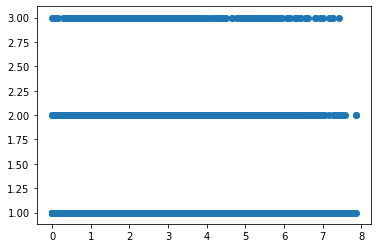

In [0]:
plt.scatter(df2['distance_travelled'], df2['passenger_count'])
plt.show()

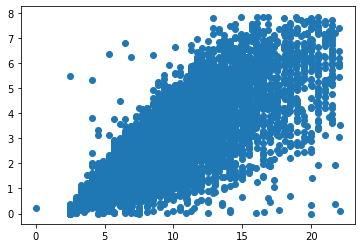

In [0]:
plt.scatter(df2['fare_amount'], df2['distance_travelled'])
plt.show()


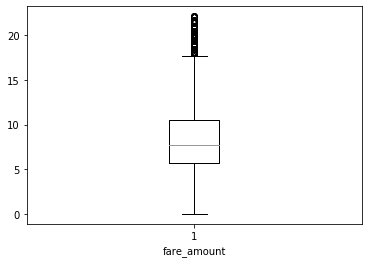

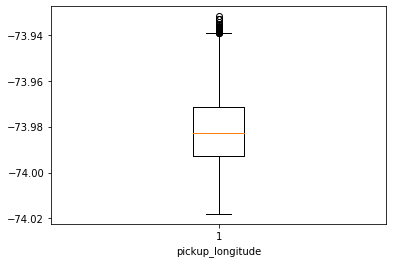

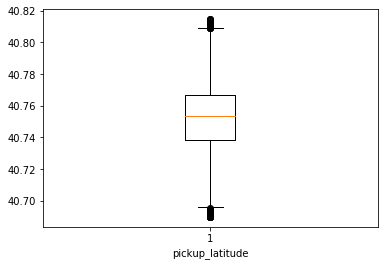

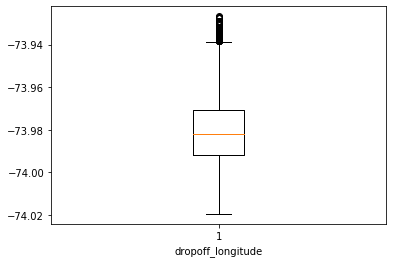

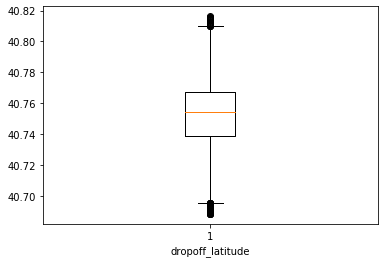

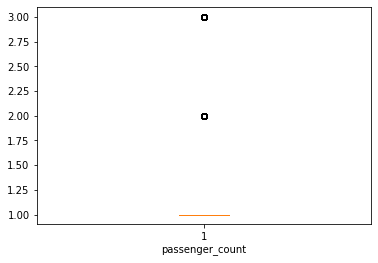

In [0]:
for i in [0,2,3,4,5,6]:
    plt.boxplot(df2.iloc[:,i])
    plt.xlabel(df2.columns[i])
    plt.show()

In [0]:
df3=df2


In [0]:
df2

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled
0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525
1,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270
2,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157
3,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0,3.787239
4,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0,1.555807
...,...,...,...,...,...,...,...,...
11746,22.0,2014-10-01 09:15:00 UTC,-73.954582,40.778047,-74.005982,40.742117,1.0,5.890958
11747,10.9,2009-05-20 18:56:42 UTC,-73.994191,40.751138,-73.962769,40.769719,1.0,3.357490
11748,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0,0.850044
11749,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0,1.469105


In [0]:
#From here let us consider only the distance_travelled and omit latitude and longitude details
df3 = pd.concat([df3.iloc[:,0:2],df3.iloc[:,6:8]], axis = 1)

In [0]:
df3

,fare_amount,pickup_datetime,passenger_count,distance_travelled
0,5.7,2011-08-18 00:35:00 UTC,2.0,1.389525
1,7.7,2012-04-21 04:30:42 UTC,1.0,2.799270
2,5.3,2010-03-09 07:51:00 UTC,1.0,1.999157
3,12.1,2011-01-06 09:50:45 UTC,1.0,3.787239
4,7.5,2012-11-20 20:35:00 UTC,1.0,1.555807
...,...,...,...,...
11746,22.0,2014-10-01 09:15:00 UTC,1.0,5.890958
11747,10.9,2009-05-20 18:56:42 UTC,1.0,3.357490
11748,6.5,2014-12-12 07:41:00 UTC,1.0,0.850044
11749,8.5,2009-11-11 11:19:07 UTC,1.0,1.469105


Now let us convert the date time data into proper format and extract the time and date details.

In [0]:
df3['pickup_datetime'] = pd.to_datetime(df3['pickup_datetime'],  errors='coerce')
print (df3)

       fare_amount  ... distance_travelled
0              5.7  ...           1.389525
1              7.7  ...           2.799270
2              5.3  ...           1.999157
3             12.1  ...           3.787239
4              7.5  ...           1.555807
...            ...  ...                ...
11746         22.0  ...           5.890958
11747         10.9  ...           3.357490
11748          6.5  ...           0.850044
11749          8.5  ...           1.469105
11750          8.1  ...           2.590036

[11751 rows x 4 columns]


In [0]:

df3["pickup_datetime"]= pd.to_datetime(df3["pickup_datetime"], format= "%Y-%m-%d %H:%M:%S UTC")



In [0]:
df3['Year'] = df3['pickup_datetime'].dt.year
df3['Month'] = df3['pickup_datetime'].dt.month
df3['Day'] = df3['pickup_datetime'].dt.day
df3['Hour'] = df3['pickup_datetime'].dt.hour
df3['Time'] = df3['pickup_datetime'].dt.time

In [0]:
df3

,fare_amount,pickup_datetime,passenger_count,distance_travelled,Year,Month,Day,Hour,Time
0,5.7,2011-08-18 00:35:00+00:00,2.0,1.389525,2011.0,8.0,18.0,0.0,00:35:00
1,7.7,2012-04-21 04:30:42+00:00,1.0,2.799270,2012.0,4.0,21.0,4.0,04:30:42
2,5.3,2010-03-09 07:51:00+00:00,1.0,1.999157,2010.0,3.0,9.0,7.0,07:51:00
3,12.1,2011-01-06 09:50:45+00:00,1.0,3.787239,2011.0,1.0,6.0,9.0,09:50:45
4,7.5,2012-11-20 20:35:00+00:00,1.0,1.555807,2012.0,11.0,20.0,20.0,20:35:00
...,...,...,...,...,...,...,...,...,...
11746,22.0,2014-10-01 09:15:00+00:00,1.0,5.890958,2014.0,10.0,1.0,9.0,09:15:00
11747,10.9,2009-05-20 18:56:42+00:00,1.0,3.357490,2009.0,5.0,20.0,18.0,18:56:42
11748,6.5,2014-12-12 07:41:00+00:00,1.0,0.850044,2014.0,12.0,12.0,7.0,07:41:00
11749,8.5,2009-11-11 11:19:07+00:00,1.0,1.469105,2009.0,11.0,11.0,11.0,11:19:07


#Feature Selection

Correlation analysis for forming the heatmap based on correlation matrix

In [0]:
#Formation of Correlation Matrix

cor = df3.iloc[:,:].corr()
cor

,fare_amount,passenger_count,distance_travelled,Year,Month,Day,Hour
fare_amount,1.000000,0.020497,0.814295,0.170085,0.033016,-0.020020,0.011454
passenger_count,0.020497,1.000000,0.010355,-0.021825,0.015183,0.000625,0.040964
distance_travelled,0.814295,0.010355,1.000000,-0.003574,0.001364,-0.010686,-0.011586
Year,0.170085,-0.021825,-0.003574,1.000000,-0.114396,-0.037773,0.003553
Month,0.033016,0.015183,0.001364,-0.114396,1.000000,-0.015855,-0.006100
Day,-0.020020,0.000625,-0.010686,-0.037773,-0.015855,1.000000,0.005694
Hour,0.011454,0.040964,-0.011586,0.003553,-0.006100,0.005694,1.000000


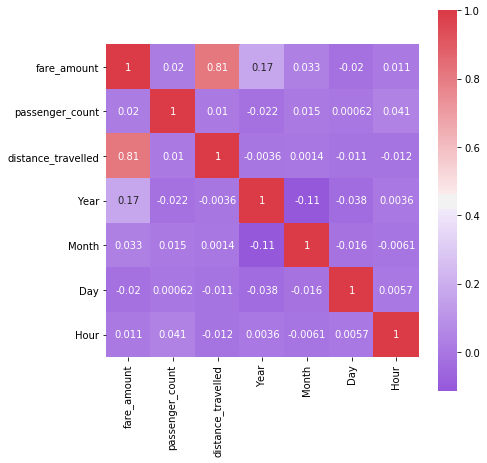

In [0]:
import seaborn as sns
#Fixing the figure size and generating heatmap
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cor,square=True,annot=True,cmap=sns.diverging_palette(1000, 10, as_cmap=True), ax=ax);

From the heatmap, we can find that 'distance_travelled' is highly correlated with the 'fare_amount', but the remaining variables are not correlated with any of dependent or independent variables.

But, as the variables 'passenger_count','Year', 'Month', 'Day' are considered categorical and 'fare_amount' is numeric, we can take the ANOVA test for feature selection.

In [0]:
df3=df3.dropna(how='any') # droping null values
from sklearn.feature_selection import f_classif
#F-statistic and p-value
F_val, pval = f_classif(df3.iloc[:,2:8],df3['fare_amount'])
print("F-statistic value:")
print(F_val)

F-statistic value:
[  1.01704619 221.72515022 114.03808361   1.76581176   1.04691783
   1.53327228]


In [0]:
print("p-value:")
print(pval)

p-value:
[4.30369372e-01 0.00000000e+00 0.00000000e+00 2.82018770e-07
 3.41960247e-01 1.16787438e-04]


Let us have a p-value threshold of 0.05. Those below 0.05 can be selected for modelling phase. 
So, going forward, we can have 'distance_travelled','Year','Month' and 'fare_amount' data in the dataset.

In [0]:
df4=df3.iloc[:,[3,4,5,0]]

In [0]:
df4

,distance_travelled,Year,Month,fare_amount
0,1.389525,2011.0,8.0,5.7
1,2.799270,2012.0,4.0,7.7
2,1.999157,2010.0,3.0,5.3
3,3.787239,2011.0,1.0,12.1
4,1.555807,2012.0,11.0,7.5
...,...,...,...,...
11746,5.890958,2014.0,10.0,22.0
11747,3.357490,2009.0,5.0,10.9
11748,0.850044,2014.0,12.0,6.5
11749,1.469105,2009.0,11.0,8.5


### Feature Scaling

Feature scaling is in progress:


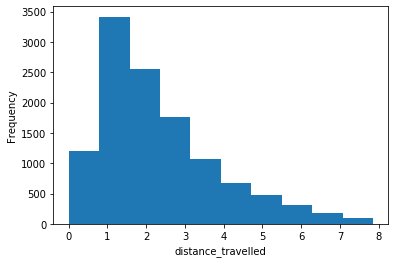

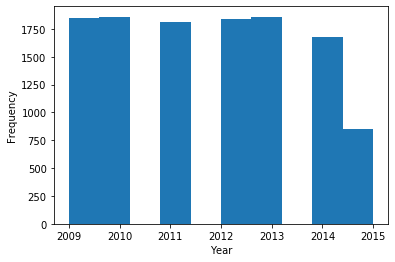

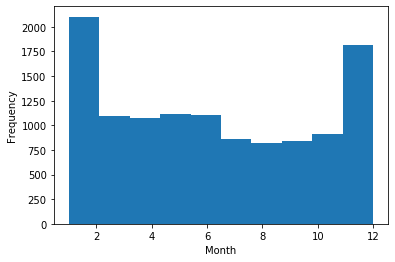

In [0]:
#Let us check the distribution of independent variables
print ("Feature scaling is in progress:")
norm_var = ["distance_travelled","Year","Month"]
for i in norm_var:
    plt.hist(df4[i])
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

As all the variables are not normally distributed, let us use 'Normalization' for feature scaling

In [0]:
df5 = df4.copy(deep=False)


In [0]:
df5

,distance_travelled,Year,Month,fare_amount
0,1.389525,2011.0,8.0,5.7
1,2.799270,2012.0,4.0,7.7
2,1.999157,2010.0,3.0,5.3
3,3.787239,2011.0,1.0,12.1
4,1.555807,2012.0,11.0,7.5
...,...,...,...,...
11746,5.890958,2014.0,10.0,22.0
11747,3.357490,2009.0,5.0,10.9
11748,0.850044,2014.0,12.0,6.5
11749,1.469105,2009.0,11.0,8.5


In [0]:
norm_var = ["distance_travelled","Year","Month"]
for i in norm_var:
    df5[i] = (df5[i] - min(df5[i]))/(max(df5[i]) - min(df5[i]))

In [0]:
print("After all the pre-processing techniques, the dataset is as follows:")
print(df5.head())

After all the pre-processing techniques, the dataset is as follows:
   distance_travelled      Year     Month  fare_amount
0            0.176878  0.333333  0.636364          5.7
1            0.356356  0.500000  0.272727          7.7
2            0.254491  0.166667  0.181818          5.3
3            0.482136  0.333333  0.000000         12.1
4            0.198048  0.500000  0.909091          7.5


Feature scaling is in progress:


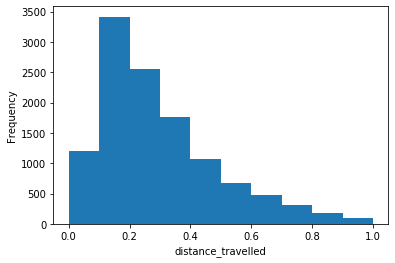

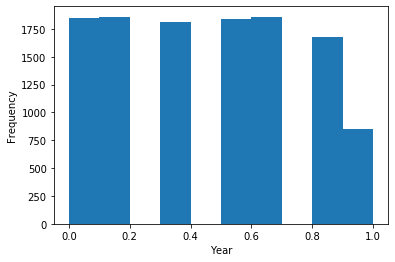

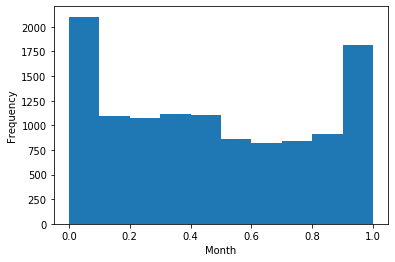

In [0]:
#Let us check the distribution of independent variables
print ("Feature scaling is in progress:")
norm_var = ["distance_travelled","Year","Month"]
for i in norm_var:
    plt.hist(df5[i])
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

In [0]:
df5

,distance_travelled,Year,Month,fare_amount
0,0.176878,0.333333,0.636364,5.7
1,0.356356,0.500000,0.272727,7.7
2,0.254491,0.166667,0.181818,5.3
3,0.482136,0.333333,0.000000,12.1
4,0.198048,0.500000,0.909091,7.5
...,...,...,...,...
11746,0.749965,0.833333,0.818182,22.0
11747,0.427424,0.000000,0.363636,10.9
11748,0.108195,0.833333,1.000000,6.5
11749,0.187009,0.000000,0.909091,8.5


Now the data is completely Normalised and the basic pre processing is completed and the dataset is ready for the Modelling phase.

##Modeling
#Error Metric
In this project, we are going to use RMSE, R-squared and Adjusted R-squared values as the error metrics to measure the performance of the model. The reason behind this is given in the documentation.

In [0]:
#Defining RMSE, R-squared and Adjusted R-squared
print("Modeling phase has started:")
def rmse(actual, predicted):
    result = (np.mean((actual-predicted)**2))**0.5
    return result

def rsq(actual, predicted):
    result = 1-(sum((actual-predicted)**2)/sum((np.mean(actual)-predicted)**2))
    return result

def adjrsq(rsq,n,k):
    result = 1-((1-rsq)*(n-1)/(n-k-1))
    return result

Modeling phase has started:


##Linear Regression
The first simple model is the Linear Regression

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#Sampling the data for training and testing purposes
train_data, test_data = train_test_split(df5, test_size=0.2)

In [0]:
import statsmodels.api as sm

In [0]:
#Model generation
reg_model = sm.OLS(train_data.iloc[:,3],train_data.iloc[:,0:3]).fit()

In [0]:
#Generating predictions based on the model
reg_predictions = reg_model.predict(test_data.iloc[:,0:3])

In [0]:
#Evaluating the model
print("Linear Regression model status")
print("RMSE - " + str(rmse(test_data.iloc[:,3],reg_predictions)))
print("R-squared - " + str(reg_model.rsquared))
print("Adjusted R-squared - " + str(reg_model.rsquared_adj))

Linear Regression model status
RMSE - 2.29083117251705
R-squared - 0.9417843263534004
Adjusted R-squared - 0.9417657409515764


In [0]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          5.067e+04
Date:                Thu, 13 Feb 2020   Prob (F-statistic):                        0.00
Time:                        03:28:58   Log-Likelihood:                         -20999.
No. Observations:                9400   AIC:                                  4.200e+04
Df Residuals:                    9397   BIC:                                  4.203e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
distance_travelled    18.4010      0.102    180.016      0.000      18.201      18.601
Year                   3.8272      0.061     62.283      0.000       3.707       3.948
Month                  2.2789      0.061     37.652      0.000       2.160       2.398
==============================================================================
Omnibus:                     1683.597   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6901.251
Skew:                           0.838   Prob(JB):                         0.00
Kurtosis:                       6.849   Cond. No.                         3.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

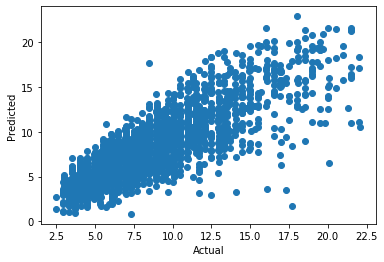

In [0]:
#Scatter plot to visualise cnt variable predictions
plt.scatter(test_data.iloc[:,3],reg_predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

##Decision Tree
The next model is the decision tree.

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
#We can use the same train and test data here
tree_model = DecisionTreeRegressor(max_depth = 5).fit(train_data.iloc[:,0:3],train_data.iloc[:,3])

In [0]:
#Generating predictions based on the model
tree_predictions = tree_model.predict(test_data.iloc[:,0:3])

In [0]:
#Evaluating the model
print("Decision Tree model status")
print("RMSE - " + str(rmse(test_data.iloc[:,3],tree_predictions)))
rsq_value = rsq(test_data.iloc[:,3],tree_predictions)
print("R-squared - " + str(rsq_value))
print("Adjusted R-squared - " + str(adjrsq(rsq_value,df5.shape[0],df5.shape[1])))

Decision Tree model status
RMSE - 2.0874556443541414
R-squared - 0.5724807527200699
Adjusted R-squared - 0.5723351522952833


In [0]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus as pdp
from IPython.display import Image

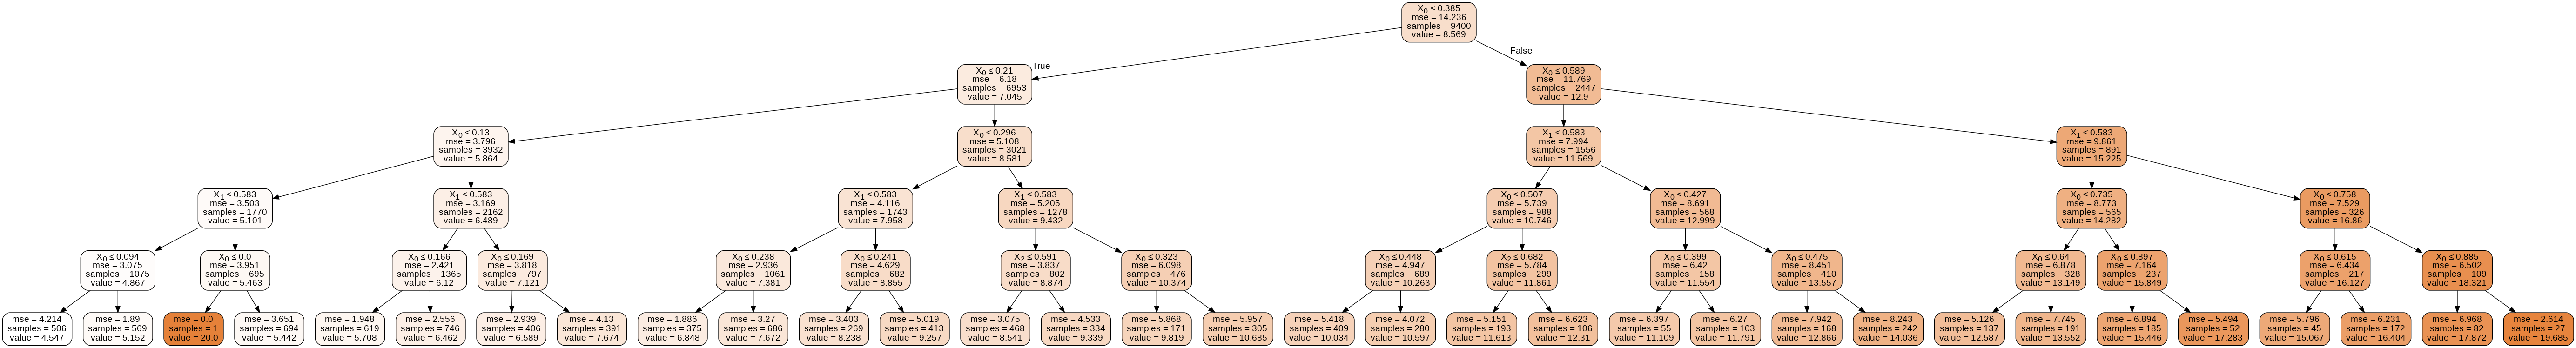

In [0]:
#To visualise a decision tree
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pdp.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("DT.png") #The decision tree is exported to the directory as png file
Image(graph.create_png())

##Random Forest
The next model is the Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
#We can use the same train and test data here too
forest_model = RandomForestRegressor(n_estimators = 10).fit(train_data.iloc[:,0:3],train_data.iloc[:,3])

In [0]:
#Generating predictions based on the model
forest_predictions = forest_model.predict(test_data.iloc[:,0:3])

In [0]:
#Evaluating the model
print("Random Forest model status")
print("RMSE - " + str(rmse(test_data.iloc[:,3],forest_predictions)))
rsq_value = rsq(test_data.iloc[:,3],forest_predictions)
print("R-squared - " + str(rsq_value))
print("Adjusted R-squared - " + str(adjrsq(rsq_value,df5.shape[0],df5.shape[1])))

Random Forest model status
RMSE - 2.35415834027022
R-squared - 0.5198100426619913
Adjusted R-squared - 0.5196465041494879


Based on the error metrics and goodness of fit metrics, Linear Regression model is better when compared to the other two models. So Linear Regression model is selected for this dataset.

So, we shall use the Linear Regression model to predict the cab fare for our future expansion.

##Output
Using Linear Regression model, let us predict the fare amount using data in test.csv.

In [0]:
#Loading the test dataset
test = pd.read_csv("https://raw.githubusercontent.com/AravindSatheesh/Cab-Fare-Prediction/fb7c6fe7492946e79f2c26dfab2c58fe43765a86/test.csv")

In [0]:
df6 = test.copy()

In [0]:
#Calculating distance travelled
for i in range(0,df6.shape[0]):
    df6.loc[i,'distance_travelled']=haversine(df6.loc[i,'pickup_longitude'],df6.loc[i,'pickup_latitude'],df6.loc[i,'dropoff_longitude'],df6.loc[i,'dropoff_latitude'])

In [0]:
#Fetching Year and Month from timestamp
df6["pickup_datetime"]= pd.to_datetime(df6["pickup_datetime"], format= "%Y-%m-%d %H:%M:%S UTC")

In [0]:
df6['Month'] = df6['pickup_datetime'].dt.month
df6['Year'] = df6['pickup_datetime'].dt.year

In [0]:
df6 = df6.loc[:,['distance_travelled','Year','Month']]

In [0]:
#Normalizing  the data
norm_var = ["distance_travelled","Year","Month"]
for i in norm_var:
    df6[i] = (df6[i] - min(df6[i]))/(max(df6[i]) - min(df6[i]))

In [0]:
#Predicting the fare based on the test dataset and Regression model
fare = reg_model.predict(df6.iloc[:,0:3])

In [0]:
test['fare_amount']=fare

In [0]:
print("The test data is invoked and fare_amount is predicted")
print(test.head())

The test data is invoked and fare_amount is predicted
           pickup_datetime  pickup_longitude  ...  passenger_count  fare_amount
0  2015-01-27 13:08:24 UTC        -73.973320  ...                1     4.254729
1  2015-01-27 13:08:24 UTC        -73.986862  ...                1     4.273516
2  2011-10-08 11:53:44 UTC        -73.982524  ...                1     3.254153
3  2012-12-01 21:12:12 UTC        -73.981160  ...                1     4.553398
4  2012-12-01 21:12:12 UTC        -73.966046  ...                1     5.183892

[5 rows x 7 columns]
